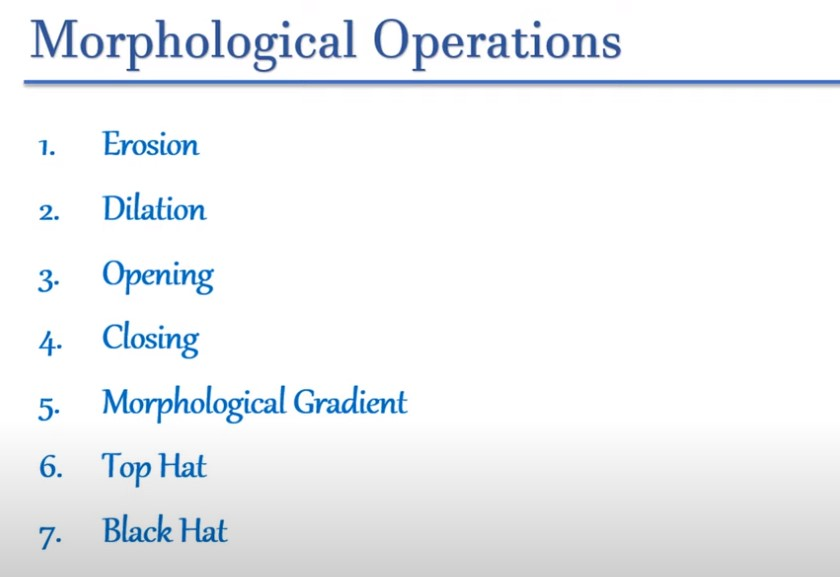

## Theory

Morphological transformations are some simple operations based on the image shape. It is normally performed on <b>binary images</b>. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation. Two basic morphological operators are Erosion and Dilation. Then its variant forms like Opening, Closing, Gradient etc also comes into play. We will see them one-by-one with help of following image

#### https://docs.opencv.org/3.4/d9/d61/tutorial_py_morphological_ops.html

## Erosion

The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white). So what it does? The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).

So what happends is that, all the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc.

Here, as an example, I would use a 5x5 kernel with full of ones. Let's see it how it works

### Syntax: cv2.erode(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]])

In [1]:
# Import Libraries
import cv2
import numpy as np

In [17]:
# Read Images

# road_img = cv2.imread(filename="Image/resize_road_img.jpg", flags=0) # I just read the single channel
girl_img = cv2.imread(filename="Image/lena.png", flags=0)
word_img = cv2.imread(filename="Image/word.jpg", flags=0) # I just read the single channel

# Display Images

cv2.imshow("Image Road", girl_img)
cv2.imshow("Image Word", word_img)

cv2.waitKey()
cv2.destroyAllWindows()


In [3]:
# Create Kernel

kernel = np.ones(shape=(5,5), dtype=np.uint8)

kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [18]:
# Erode girl images

# If you increase iterations eroation will be increase 

erode_girl_img = cv2.erode(src=girl_img, kernel=kernel, iterations=1)

orginal_and_erode_girl_img = np.hstack((girl_img, erode_girl_img))

# Display Images

cv2.imshow("Erode Image Girl", orginal_and_erode_girl_img)

cv2.waitKey()
cv2.destroyAllWindows()

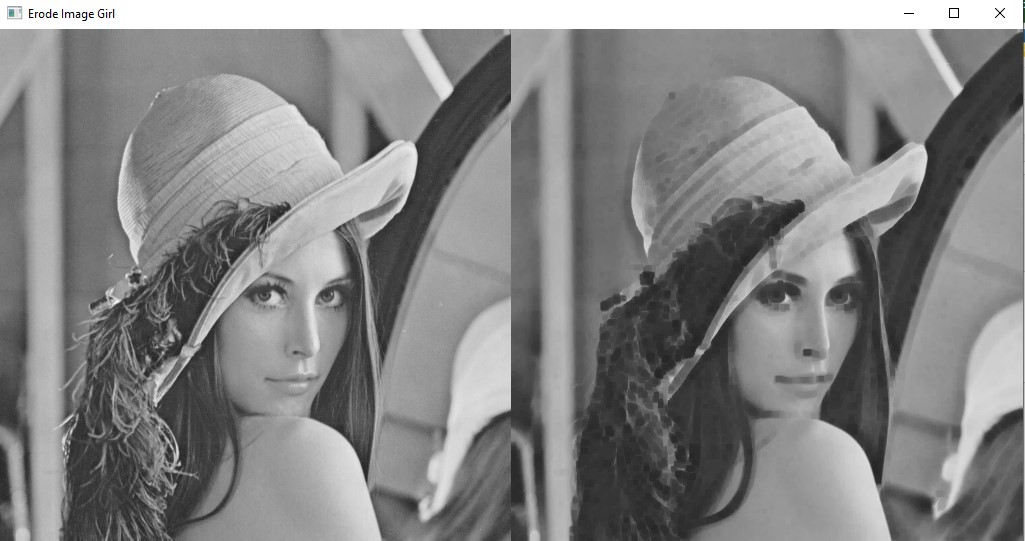

In [19]:
# Erode word images

# If you increase iterations eroation will be increase 

erode_word_img = cv2.erode(src=word_img, kernel=kernel, iterations=2)

orginal_and_erode_img = np.hstack((word_img, erode_word_img))

# Display Images

cv2.imshow("Erode Image Word", orginal_and_erode_img)
cv2.waitKey()
cv2.destroyAllWindows()

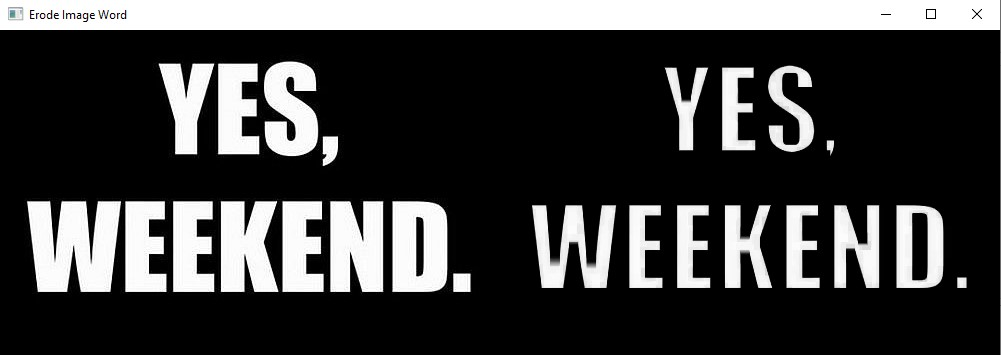

## Dilation

In [20]:
# Dilation girl images

# If you increase iterations eroation will be increase 

dilation_girl_img = cv2.dilate(src=girl_img, kernel=kernel, iterations=1)

orginal_and_dilation_girl_img = np.hstack((girl_img, dilation_girl_img))

# Display Images

cv2.imshow("Dilation Image Girl", orginal_and_dilation_girl_img)

cv2.waitKey()
cv2.destroyAllWindows()

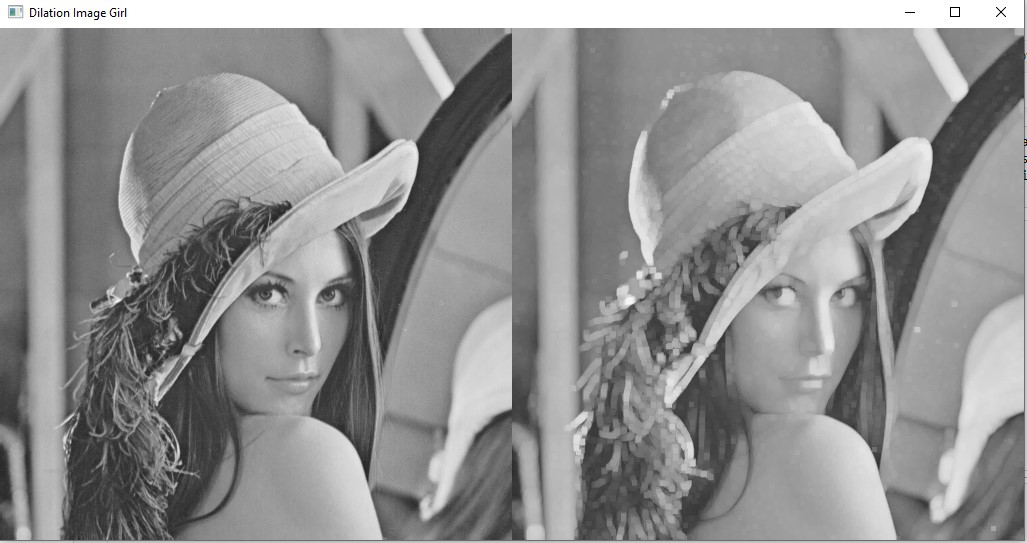

In [21]:
# Dilation word images

# If you increase iterations eroation will be increase 

dilation_word_img = cv2.dilate(src=word_img, kernel=kernel, iterations=1)

orginal_and_dilation_img = np.hstack((word_img, dilation_word_img))

# Display Images

cv2.imshow("Dilation Image Word", orginal_and_dilation_img)
cv2.waitKey()
cv2.destroyAllWindows()

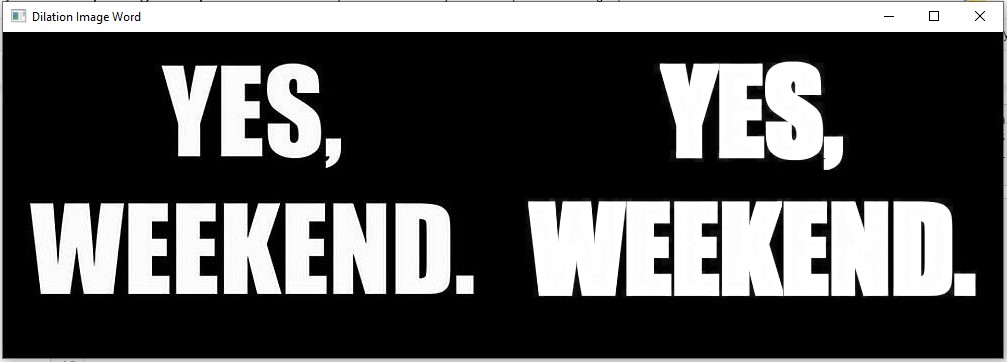

## Opening

Opening is just another name of erosion followed by dilation. It is useful in removing noise, as we explained above. Here we use the function, cv.morphologyEx()

In [22]:
opening = cv2.morphologyEx(src=girl_img, op=cv2.MORPH_OPEN, kernel=kernel, iterations=2)


# Display Images
cv2.imshow(winname="Opening Image", mat=opening)
cv2.waitKey()
cv2.destroyAllWindows()

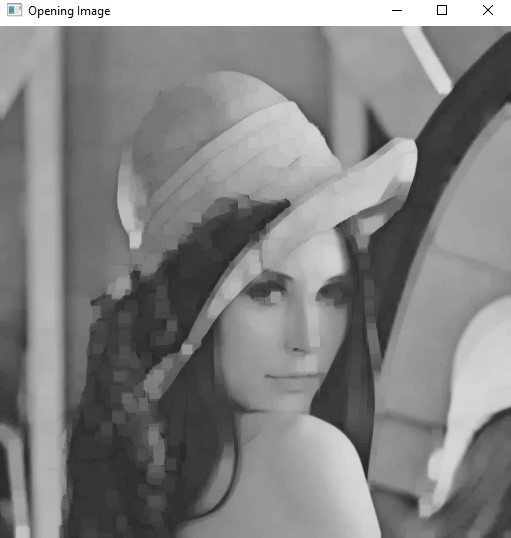

## Closing

Closing is reverse of Opening, <b>Dilation followed by Erosion</b>. It is useful in closing small holes inside the foreground objects, or small black points on the object.

In [23]:
closing = cv2.morphologyEx(src=girl_img, op=cv2.MORPH_CLOSE, kernel=kernel, iterations=2)

# Display Images
cv2.imshow(winname="Closing Image", mat=closing)
cv2.waitKey()
cv2.destroyAllWindows()

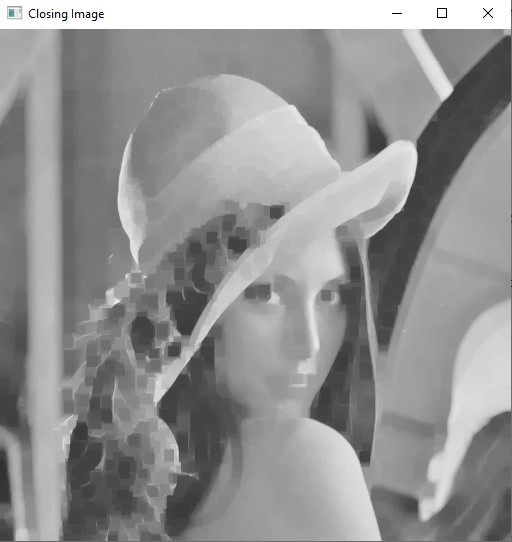

## Morphological Gradient

It is the difference between dilation and erosion of an image.

The result will look like the outline of the object.

In [24]:
gradient = cv2.morphologyEx(src=girl_img, op=cv2.MORPH_GRADIENT, kernel=kernel, iterations=2)

orginal_and_gradient_img = np.hstack((girl_img, gradient))

# Display Images
cv2.imshow(winname="Gradient Image", mat=orginal_and_gradient_img)
cv2.waitKey()
cv2.destroyAllWindows()

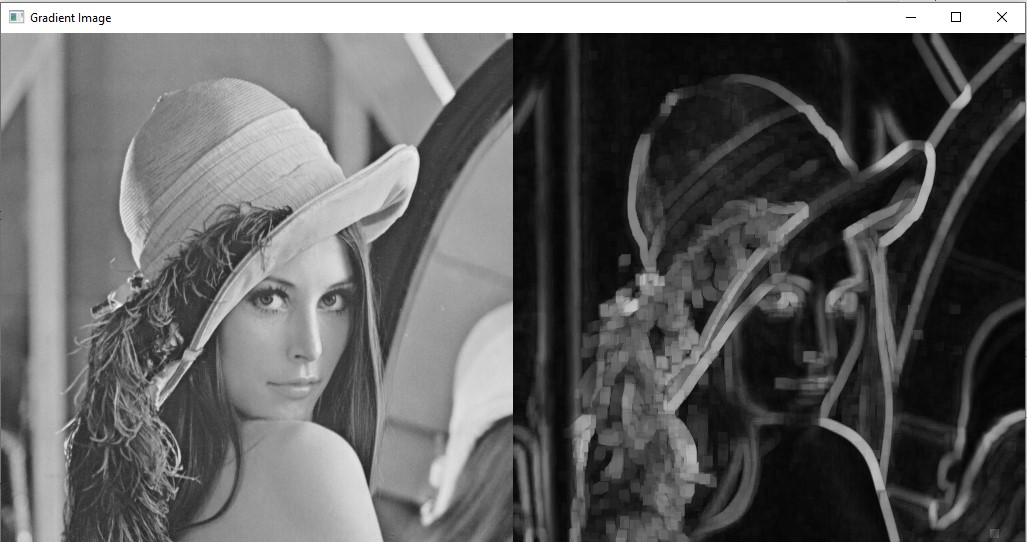

## Top Hat

It is the difference between input image and Opening of the image. Below example is done for a 9x9 kernel.

In [25]:
tophat = cv2.morphologyEx(src=girl_img, op=cv2.MORPH_TOPHAT, kernel=kernel, iterations=2)

orginal_and_tophat_img = np.hstack((girl_img, tophat))

# Display Images
cv2.imshow(winname="TopHat Image", mat=orginal_and_tophat_img)
cv2.waitKey()
cv2.destroyAllWindows()

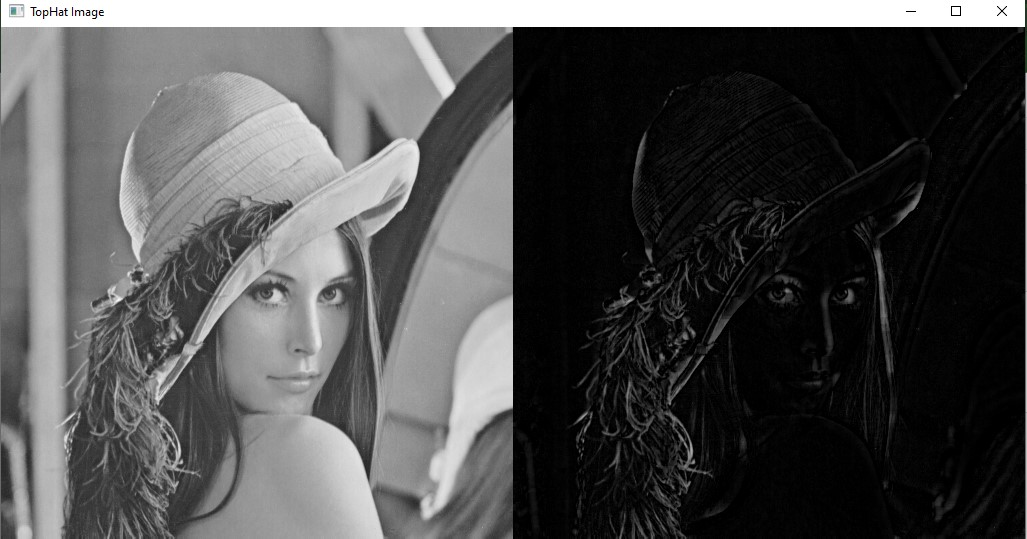

## Black Hat

It is the difference between the closing of the input image and input image

In [13]:
blackhat = cv2.morphologyEx(src=girl_img, op=cv2.MORPH_BLACKHAT, kernel=kernel, iterations=2)

orginal_and_blackhat_img = np.hstack((girl_img, blackhat))

# Display Images
cv2.imshow(winname="Black Hat Image", mat=orginal_and_blackhat_img)
cv2.waitKey()
cv2.destroyAllWindows()

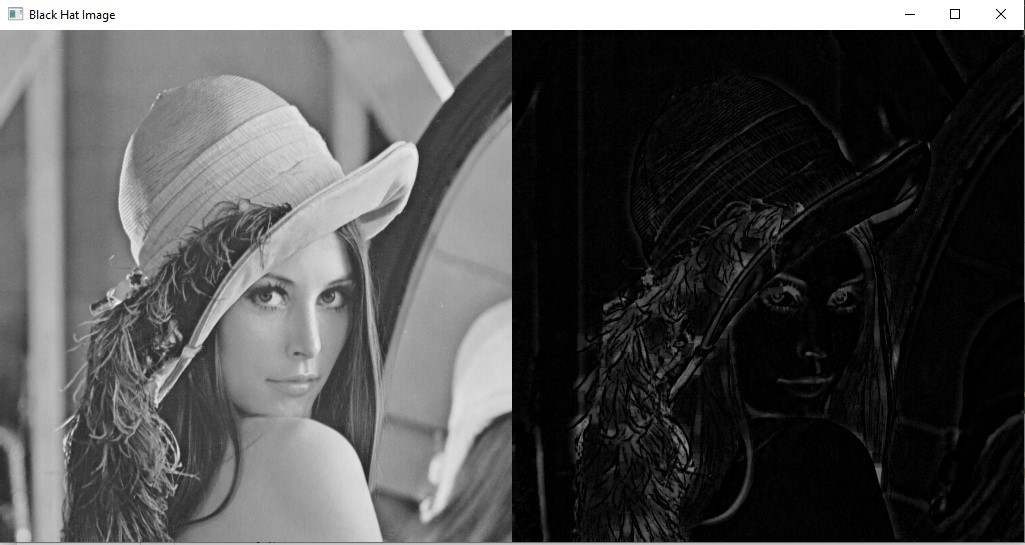

## Structuring Element

We manually created a structuring elements in the previous examples with help of Numpy. It is rectangular shape. But in some cases, you may need elliptical/circular shaped kernels. So for this purpose, OpenCV has a function, <b>cv.getStructuringElement()</b>. You just pass the shape and size of the kernel, you get the desired kernel.

In [14]:
# Rectangular Kernel

cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(5,5))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [15]:
# Cross-shaped kernel
cv2.getStructuringElement(shape=cv2.MORPH_CROSS, ksize=(5,5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [16]:
# Elliptical Kernel
cv2.getStructuringElement(shape=cv2.MORPH_ELLIPSE, ksize=(5,5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [2]:
# Rectangular Kernel
print(cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(5,5)))

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
